In [19]:
library(dplyr)
library(readODS)
library(ggplot2)
library(scales)
library(tidyverse)
library(tidyr)
library(lubridate)
library(cowplot)

In [34]:
clean_epi <- read.csv('../data/Full_epi_data.csv')[,-1]

In [26]:
snps_epi <- read.csv('../data/snps_epi_pairwise.csv')[,-1]
head(snps_epi)
xsnps_epi <- read.csv("../data//xspns_epi.csv")[,-c(1,2)]
head(xsnps_epi)
# xsnps_epi <- read.csv('../data/xsnps_e')[,-1]

,Sample.1,Sample.2,wg_snps,cs_snps,Date.of.Collection.x,Source.x,Patient.x,SequenceType.x,HOSP.x,ROOM.x,Date.of.Collection.y,Source.y,Patient.y,SequenceType.y,HOSP.y,ROOM.y,ST
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,N19-02156,N19-02158,18248,16591,2017-12-06,Environmental,n/a,17,M,1809,2017-12-06,Environmental,n/a,381,M,1814,different
2,N19-02156,N19-02159,20383,17835,2017-12-06,Environmental,n/a,17,M,1809,2017-12-06,Environmental,n/a,155,M,1815,different
3,N19-02158,N19-02159,17799,16503,2017-12-06,Environmental,n/a,381,M,1814,2017-12-06,Environmental,n/a,155,M,1815,different
4,N19-02156,N19-02160,18976,17066,2017-12-06,Environmental,n/a,17,M,1809,2017-12-06,Environmental,n/a,381,M,1815,different
5,N19-02158,N19-02160,7,10,2017-12-06,Environmental,n/a,381,M,1814,2017-12-06,Environmental,n/a,381,M,1815,same
6,N19-02159,N19-02160,18516,17004,2017-12-06,Environmental,n/a,155,M,1815,2017-12-06,Environmental,n/a,381,M,1815,different


,Loc1,Loc2,wg_snps,cg_snps,Group.x,Group.y,DateCollection.x,Source.x,Patient.x,SequenceType.x,HOSP.x,ROOM.x,DateCollection.y,Source.y,Patient.y,SequenceType.y,HOSP.y,ROOM.y,ST
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,N19-02156,N19-02158,18248,11319,pa01,pa01,2017-12-06,Environmental,n/a,17,M,1809,2017-12-06,Environmental,n/a,381,M,1814,different
2,N19-02156,N19-02159,20383,11297,pa01,pa01,2017-12-06,Environmental,n/a,17,M,1809,2017-12-06,Environmental,n/a,155,M,1815,different
3,N19-02158,N19-02159,17799,11434,pa01,pa01,2017-12-06,Environmental,n/a,381,M,1814,2017-12-06,Environmental,n/a,155,M,1815,different
4,N19-02156,N19-02160,18976,11320,pa01,pa01,2017-12-06,Environmental,n/a,17,M,1809,2017-12-06,Environmental,n/a,381,M,1815,different
5,N19-02159,N19-02160,18516,11433,pa01,pa01,2017-12-06,Environmental,n/a,155,M,1815,2017-12-06,Environmental,n/a,381,M,1815,different
6,N19-02158,N19-02160,7,1,pa01,pa01,2017-12-06,Environmental,n/a,381,M,1814,2017-12-06,Environmental,n/a,381,M,1815,same


In [27]:
## Estimate time difference between isolates

snps_epi$Date.of.Collection.x <- as.Date(snps_epi$Date.of.Collection.x)
snps_epi$Date.of.Collection.y <- as.Date(snps_epi$Date.of.Collection.y)

## add column with day difference 
snps_epi <- snps_epi %>% mutate(diff_days = as.numeric(difftime(Date.of.Collection.x,Date.of.Collection.y, units = "days")))

## Add column with month difference
snps_epi <- snps_epi %>% mutate(diff_months = interval(snps_epi$Date.of.Collection.x, snps_epi$Date.of.Collection.y) / months(1))

## add column with absolute day difference 

snps_epi <- snps_epi %>% mutate(abs_diff_days= abs(diff_days))

In [28]:
## Isolates pairs from the same patient and same day

same_patient_0day <- snps_epi %>% filter(HOSP.x==HOSP.y) %>%
filter(Source.x != 'Environmental') %>% 
filter(Source.x == Source.y) %>% 
filter(Patient.x==Patient.y) %>% 
filter(abs_diff_days==0) 

## Isolates pairs from the same patient and same day and same ST

same_patient_and_ST_0day <- snps_epi %>% 
filter(HOSP.x==HOSP.y) %>%
filter(Source.x != 'Environmental') %>% 
filter(Source.x == Source.y) %>% 
filter(Patient.x==Patient.y) %>% 
filter(abs_diff_days==0) %>% 
filter(ST=='same')

## Isolates pairs from the same patient and same ST

same_patient_and_ST <- snps_epi %>% filter(HOSP.x==HOSP.y) %>%
filter(Source.x != 'Environmental') %>% 
filter(Source.x == Source.y) %>% 
filter(Patient.x==Patient.y) %>% 
filter(ST=='same')


In [29]:
write.csv(same_patient_and_ST_0day, '../output/same_patient_and_ST_0day.csv')
write.csv(same_patient_and_ST, '../output/same_patient_and_ST.csv')

percent90_0d,percent95_0d
<dbl>,<dbl>
17,25


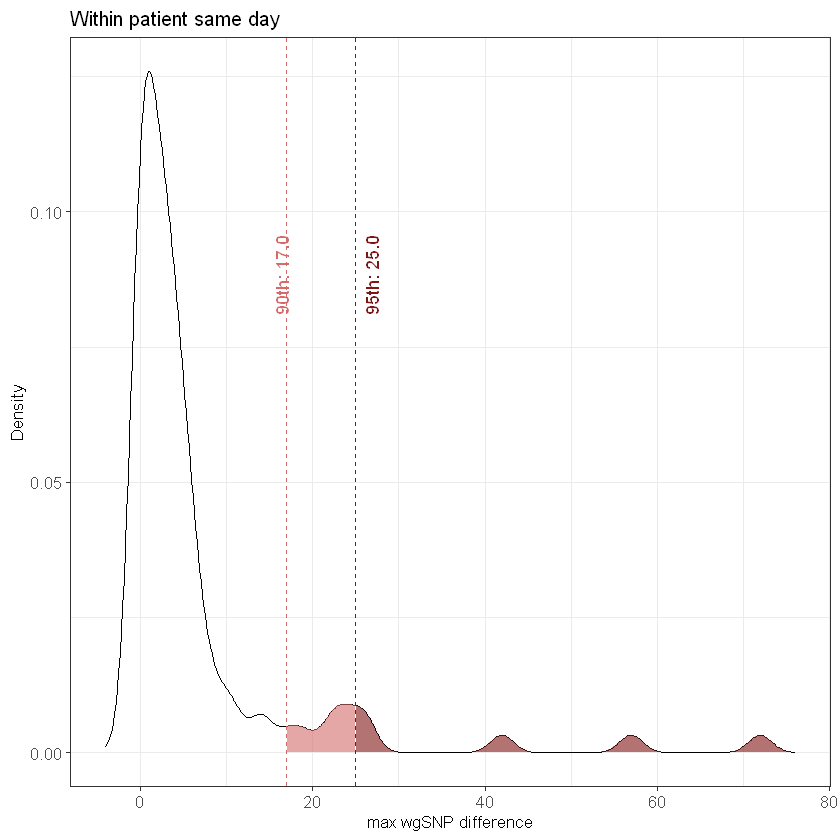

In [30]:

max_snp_per_patient <- same_patient_and_ST_0day %>% 
filter(wg_snps<=100) %>% 
group_by(Patient.x) %>% 
summarise(M=max(wg_snps)) 


perct_90_95 <- max_snp_per_patient  %>%
summarise(percent90_0d = quantile(M, probs = .90),
           percent95_0d = quantile(M, probs = .95))
perct_90_95
# Assuming max_snp_per_patient is your data frame and M is your variable of interest
# Compute the density
density_data <- density(max_snp_per_patient$M)
density_df <- data.frame(
  x = density_data$x,
  y = density_data$y
)

# Compute the 90th and 95th percentiles
wg_quantiles <- quantile(max_snp_per_patient$M, probs = c(0.90, 0.95))

# Create the density plot with filled areas after the 90th and 95th percentiles
wg_cd_plot <- ggplot(density_df, aes(x = x, y = y)) +
  geom_line(color = "black") +
  geom_area(data = subset(density_df, x > wg_quantiles[1] & x <= wg_quantiles[2]), fill = "#D46A6A", alpha = 0.6) +
  geom_area(data = subset(density_df, x > wg_quantiles[2]), fill = "#801515", alpha = 0.6) +
  geom_vline(aes(xintercept = wg_quantiles[1]), linetype = "dashed", color = "#D46A6A") +
  geom_vline(aes(xintercept = wg_quantiles[2]), linetype = "dashed", color = "#801515") +
  annotate("text", x = wg_quantiles[1] + 1, y = max(density_df$y) * 0.7, label = "90th: 17.0", color = "#D46A6A", angle = 90, vjust = -0.5) +
  annotate("text", x = wg_quantiles[2] + 1, y = max(density_df$y) * 0.7, label = "95th: 25.0", color = "#801515", angle = 90, vjust = 1) +
  labs(
    title = "Within patient same day",
    x = "max wgSNP difference",
    y = "Density"
  ) +
  theme_bw()+
theme(title = element_text(size=10),
      axis.text.x = element_text(size=10) ,
      axis.title.x = element_text(size=10),
     axis.text.y = element_text(size=10) ,
      axis.title.y = element_text(size=10))


wg_cd_plot


percent90_0d,percent95_0d
<dbl>,<dbl>
16,22.5


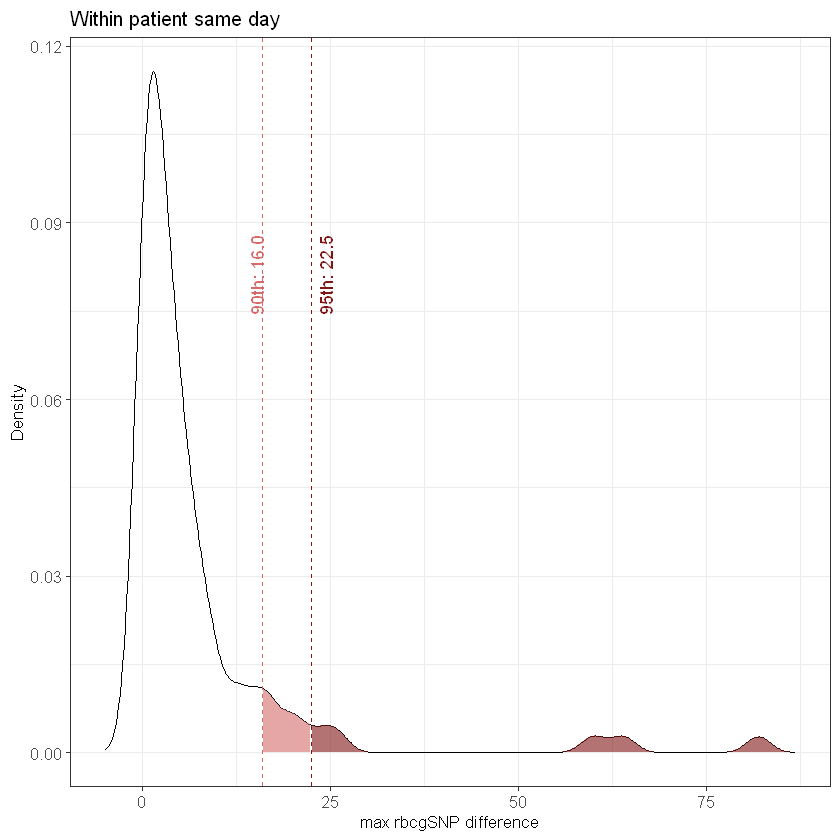

In [31]:

max_snp_per_patient <- same_patient_and_ST_0day %>% 
filter(cs_snps<=100) %>% 
group_by(Patient.x) %>% 
summarise(M=max(cs_snps)) 


perct_90_95 <- max_snp_per_patient  %>%
summarise(percent90_0d = quantile(M, probs = .90),
           percent95_0d = quantile(M, probs = .95))
perct_90_95

# Assuming max_snp_per_patient is your data frame and M is your variable of interest
# Compute the density
density_data <- density(max_snp_per_patient$M)
density_df <- data.frame(
  x = density_data$x,
  y = density_data$y
)

# Compute the 90th and 95th percentiles
cs_quantiles <- quantile(max_snp_per_patient$M, probs = c(0.90, 0.95))

# Create the density plot with filled areas after the 90th and 95th percentiles
cs_cd_plot <- ggplot(density_df, aes(x = x, y = y)) +
  geom_line(color = "black") +
  geom_area(data = subset(density_df, x > cs_quantiles[1] & x <= cs_quantiles[2]), fill = "#D46A6A", alpha = 0.6) +
  geom_area(data = subset(density_df, x > cs_quantiles[2]), fill = "#801515", alpha = 0.6) +
  geom_vline(aes(xintercept = cs_quantiles[1]), linetype = "dashed", color = "#D46A6A") +
  geom_vline(aes(xintercept = cs_quantiles[2]), linetype = "dashed", color = "#801515") +
  annotate("text", x = cs_quantiles[1] + 1, y = max(density_df$y) * 0.7, label = "90th: 16.0", color = "#D46A6A", angle = 90, vjust = -0.5) +
  annotate("text", x = cs_quantiles[2] + 1, y = max(density_df$y) * 0.7, label = "95th: 22.5", color = "#801515", angle = 90, vjust = 1) +
  labs(
    title = "Within patient same day",
    x = "max rbcgSNP difference",
    y = "Density"
  ) +
  theme_bw()+
theme(title = element_text(size=10),
      axis.text.x = element_text(size=10) ,
      axis.title.x = element_text(size=10),
     axis.text.y = element_text(size=10) ,
      axis.title.y = element_text(size=10))


cs_cd_plot

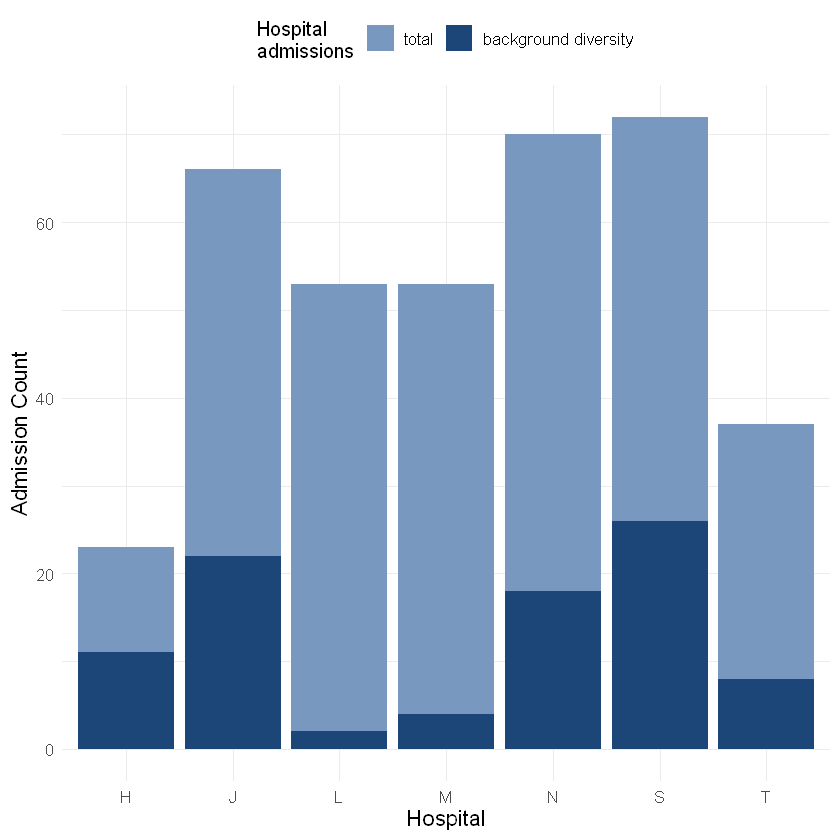

In [35]:
## Admissions for cloud diversity


df_cd <- rbind(clean_epi %>% filter(Patient != 'n/a') %>% 
select(HOSP, Patient) %>% 
distinct()  %>% 
group_by(HOSP) %>% 
tally() %>% 
mutate(cat='total'),

same_patient_and_ST_0day %>%  
select(HOSP.x,Patient.x) %>%
distinct() %>% 
group_by(HOSP.x) %>% 
tally() %>% 
mutate(cat='cloud of diversity') %>% 
rename(HOSP='HOSP.x'))

# Transform the data to calculate the remaining part
df_cd_transformed <- df_cd %>%
  pivot_wider(names_from = cat, values_from = n) %>%
  mutate(remaining = total - `cloud of diversity`) %>%
  pivot_longer(cols = c(`cloud of diversity`, remaining), names_to = "cat", values_to = "n") %>%
  mutate(cat = factor(cat, levels = c( "remaining","cloud of diversity")))

# Create the plot
adm_plt <- ggplot(df_cd_transformed, aes(x = HOSP, y = n, fill = cat)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
#     title = "Stacked Bar Plot with Total and Cloud of Diversity",
    x = "Hospital",
    y = "Admission Count"
  ) +
  scale_fill_manual(values = c("cloud of diversity" = "#1D4678", "remaining" = "#7898BF"),
                labels = c('total', 'background diversity'), name='Hospital\nadmissions') +
  theme_minimal()+
theme(legend.text = element_text(size=10),
      legend.position = 'top',
      title = element_text(size=12),
      axis.text.x = element_text(size=10) ,
      axis.title.x = element_text(size=13),
     axis.text.y = element_text(size=10) ,
      axis.title.y = element_text(size=13))

adm_plt

percent90_6m,percent95_6m
<dbl>,<dbl>
22.2,35.2


90%  95% 
22.2 35.2

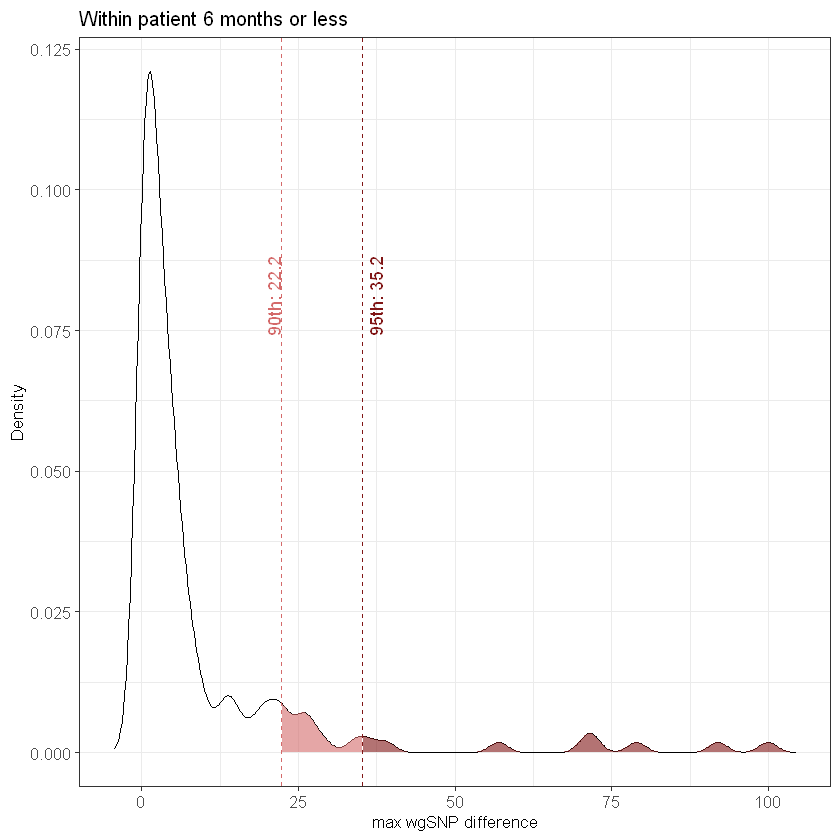

In [33]:
### 6 moths cut off whole genome

max_snp_per_patient_w6 <- same_patient_and_ST %>% 
filter(diff_months <= 6) %>%
filter(wg_snps<=100) %>% 
group_by(Patient.x) %>% 
summarise(M=max(wg_snps)) 


perct_90_95_w6 <- max_snp_per_patient_w6  %>%
summarise(percent90_6m = quantile(M, probs = .90),
           percent95_6m = quantile(M, probs = .95))
perct_90_95_w6


# Assuming max_snp_per_patient is your data frame and M is your variable of interest
# Compute the density
density_data_w6 <- density(max_snp_per_patient_w6$M)
density_df_w6 <- data.frame(
  x = density_data_w6$x,
  y = density_data_w6$y
)

# Compute the 90th and 95th percentiles
wg_quantiles_w6 <- quantile(max_snp_per_patient_w6$M, probs = c(0.90, 0.95))
wg_quantiles_w6
# Create the density plot with filled areas after the 90th and 95th percentiles
wg6m_cd_plot <- ggplot(density_df_w6, aes(x = x, y = y)) +
  geom_line(color = "black") +
  geom_area(data = subset(density_df_w6, x > wg_quantiles_w6[1] & x <= wg_quantiles_w6[2]), fill = "#D46A6A", alpha = 0.6) +
  geom_area(data = subset(density_df_w6, x > wg_quantiles_w6[2]), fill = "#801515", alpha = 0.6) +
  geom_vline(aes(xintercept = wg_quantiles_w6[1]), linetype = "dashed", color = "#D46A6A") +
  geom_vline(aes(xintercept = wg_quantiles_w6[2]), linetype = "dashed", color = "#801515") +
  annotate("text", x = wg_quantiles_w6[1] + 1, y = max(density_df$y) * 0.7, label = "90th: 22.2", color = "#D46A6A", angle = 90, vjust = -0.5) +
  annotate("text", x = wg_quantiles_w6[2] + 1, y = max(density_df$y) * 0.7, label = "95th: 35.2", color = "#801515", angle = 90, vjust = 1) +
  labs(
    title = "Within patient 6 months or less",
    x = "max wgSNP difference",
    y = "Density"
  ) +
  theme_bw()+
theme(title = element_text(size=10),
      axis.text.x = element_text(size=10) ,
      axis.title.x = element_text(size=10),
     axis.text.y = element_text(size=10) ,
      axis.title.y = element_text(size=10))

wg6m_cd_plot


percent90_6m,percent95_6m
<dbl>,<dbl>
20,42.5


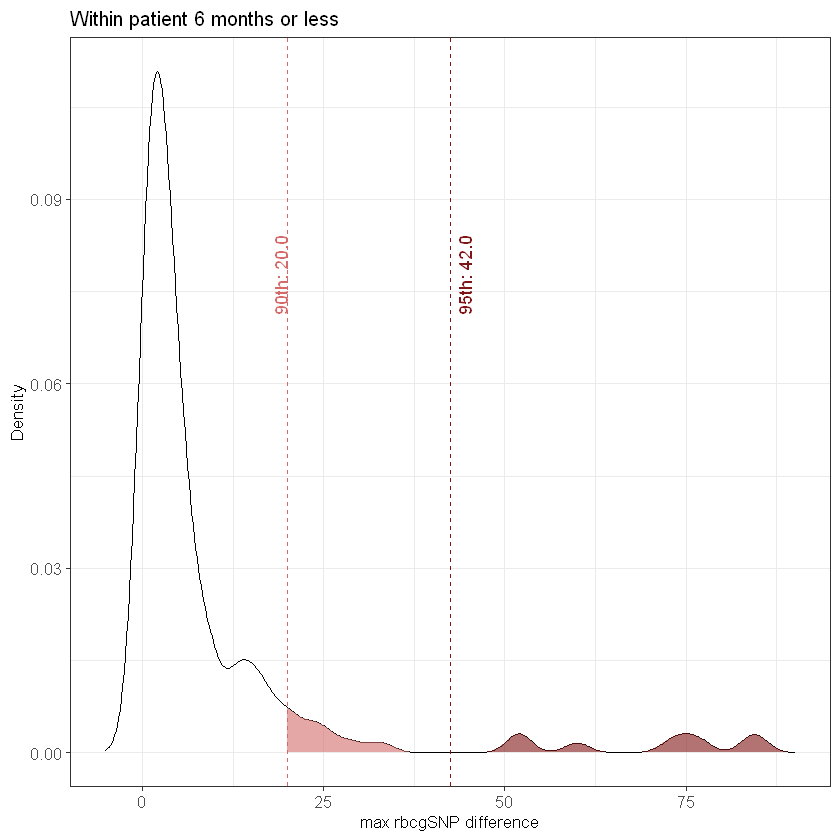

In [36]:

## 6 months cut off core genome

max_snp_per_patient <-same_patient_and_ST %>% 
filter(diff_months <= 6) %>%
filter(cs_snps<=100) %>% 
group_by(Patient.x) %>% 
summarise(M=max(cs_snps)) 


perct_90_95 <- max_snp_per_patient  %>%
summarise(percent90_6m = quantile(M, probs = .90),
           percent95_6m = quantile(M, probs = .95))
perct_90_95
# Assuming max_snp_per_patient is your data frame and M is your variable of interest
# Compute the density
density_data <- density(max_snp_per_patient$M)
density_df <- data.frame(
  x = density_data$x,
  y = density_data$y
)

# Compute the 90th and 95th percentiles
cg_quantiles <- quantile(max_snp_per_patient$M, probs = c(0.90, 0.95))

# Create the density plot with filled areas after the 90th and 95th percentiles
cg6m_cd_plot <- ggplot(density_df, aes(x = x, y = y)) +
  geom_line(color = "black") +
  geom_area(data = subset(density_df, x > cg_quantiles[1] & x <= cg_quantiles[2]), fill = "#D46A6A", alpha = 0.6) +
  geom_area(data = subset(density_df, x > cg_quantiles[2]), fill = "#801515", alpha = 0.6) +
  geom_vline(aes(xintercept = cg_quantiles[1]), linetype = "dashed", color = "#D46A6A") +
  geom_vline(aes(xintercept = cg_quantiles[2]), linetype = "dashed", color = "#801515") +
  annotate("text", x = cg_quantiles[1] + 1, y = max(density_df$y) * 0.7, label = "90th: 20.0", color = "#D46A6A", angle = 90, vjust = -0.5) +
  annotate("text", x = cg_quantiles[2] + 1, y = max(density_df$y) * 0.7, label = "95th: 42.0", color = "#801515", angle = 90, vjust = 1) +
  labs(
    title = "Within patient 6 months or less",
    x = "max rbcgSNP difference",
    y = "Density"
  ) +
  theme_bw()+
theme(title = element_text(size=10),
      axis.text.x = element_text(size=10) ,
      axis.title.x = element_text(size=10),
     axis.text.y = element_text(size=10) ,
      axis.title.y = element_text(size=10))

cg6m_cd_plot


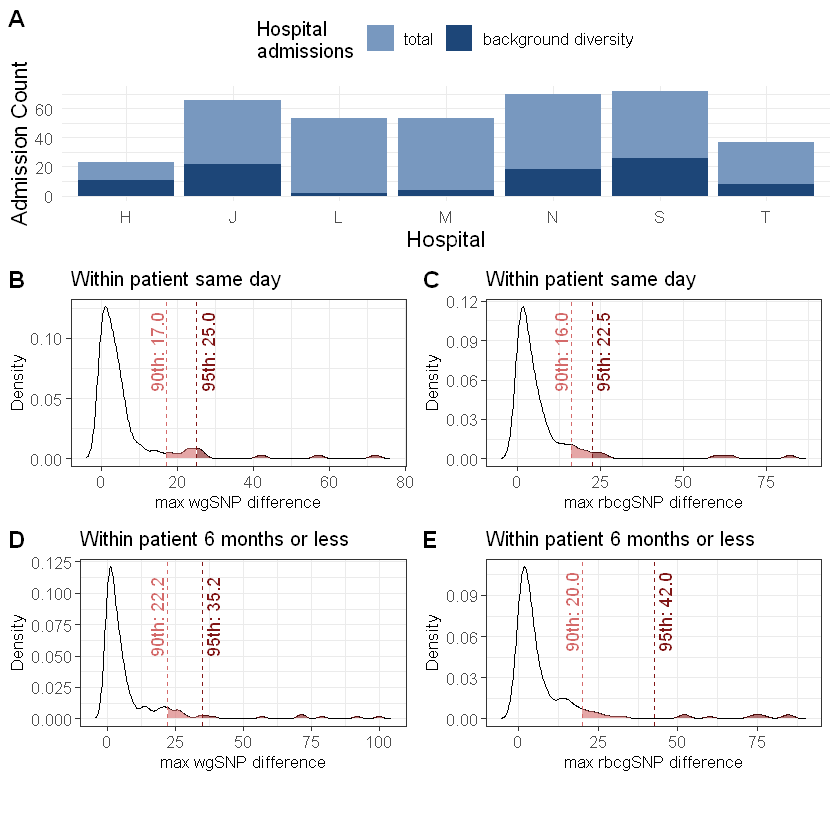

In [37]:
bcde <- plot_grid(wg_cd_plot, cs_cd_plot, wg6m_cd_plot,cg6m_cd_plot, nrow=2, ncol=2, labels = c("B","C","D","E"))
plot_grid(adm_plt, bcde, ncol=1, labels="A", align = 'hv', axis = 'br', rel_heights = c(0.45,1))
ggsave('../output/Figure2.png', device = 'png', dpi = 450, width = 6, height = 9, bg='white')